In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# data Visualization
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.ticker as mtick
py.init_notebook_mode(connected=True)

from sklearn import tree
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score, precision_recall_curve,accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, ElasticNet, HuberRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#sklearn Processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.metrics import confusion_matrix,classification_report

#feature select
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier

# untuk hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.model_selection import GridSearchCV


import scipy.stats as ss

# TELCO RATE CHURN

## PREPROCESSING AND EXPLORATORY DATA ANALYSIS

Overview : Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs

Content Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
The data set includes information about:

1. Customers who left within the last month – the column is called Churn
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers – gender, age range, and if they have partners and dependents




#### The target - The target columns is 'Churn'. It represents the customers who retained (0) and left within the last month (1).

#### Feature Info

- customerID : Customer ID
- gender : Whether the customer is a male or a female
- SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
- Partner : Whether the customer has a partner or not (Yes, No)
- Dependents : Whether the customer has dependents or not (Yes, No)
- tenure : Number of months the customer has stayed with the company
- PhoneService : Whether the customer has a phone service or not (Yes, No)
- MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract : The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges : The amount charged to the customer monthly
- TotalCharges : The total amount charged to the customer
- Churn : Whether the customer churned or not (Yes or No)

In [2]:
df = pd.read_csv("finpro.csv") 
df 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes



1. We have 4 numeric variables
2. Tenure can vary from 0 months to 72 months. This is how long customer is with Telco.
3. Total Charges = Monthly Charges * Tenure


## Data Cleaning

In [3]:
#Drop useless feature
df.drop("customerID",axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Total Charge is numeric feature, we must change the type to numeric from object

In [5]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

 ### Convert TotalCharges to numeric

- Looking at the count column, all columns have count as 7043 . TotalCharges have count of 7032, a differece of 11 records. These are missing records. we need replacecing the row

In [7]:
#Identifying the rows containing missing data
missing_value_row = list(df[df['TotalCharges'] == " "].index)
print('Missing Value Rows-->', missing_value_row , '\nTotal rows-->', len(missing_value_row))

Missing Value Rows--> [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754] 
Total rows--> 11


In [8]:
# Replacing the spaces with 0
for missing_row in missing_value_row :
    df['TotalCharges'][missing_row] = 0

In [9]:
df['TotalChargesNum']= pd.to_numeric(df['TotalCharges'])


In [10]:
df.drop("TotalCharges",axis=1,inplace=True)

In [11]:
# df.to_csv("finproclean.csv",index=False)

## UNIQUE VALUE COLUMNS

In [12]:
def unik(columnname):
    print(columnname,":" ,df[columnname].unique())
for i in range(1,len(df.columns)):
    unik(df.columns[i])

SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Churn : ['No' 'Yes

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalChargesNum
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


 Tenure can vary from 0 months to 72 months. This is how long customer is with Telco.
 Total Charges = Monthly Charges * Tenure

In [14]:
df.describe(include='object').T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


In [15]:

# Cramers'v for categorical feature correlation

def cramersv(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [16]:
corr = []
for i in df.columns:
    matrix = []
    for j in df.columns:
        matrix.append(cramersv(df[i], df[j]))
    corr.append(matrix)

corrcat = pd.DataFrame(corr, index = df.columns, columns = df.columns)

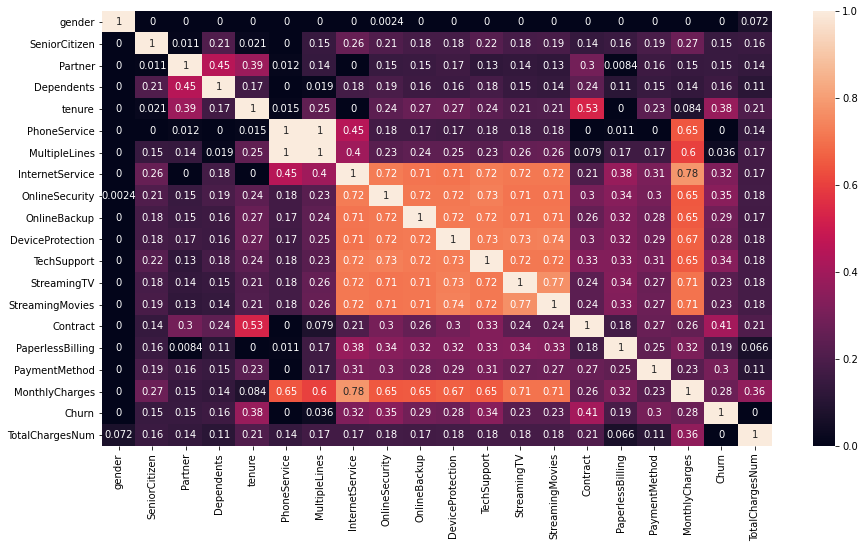

In [17]:
plt.figure(figsize = (15,8))
sns.heatmap(corrcat, annot = True)
plt.show()

We can see that there are several features that have a correlation of more than 0.7. 

10 feature that have high correlation with target (Curn) that is : Contract, tenure, techsupport, onlinesecurity, internetservice, onlinebackup, deviceprotection, monthlycharge, streamingtv, streamingmovies.

# TARGET

# CHURN VALUE COUNT

In [18]:
churn = df[(df["Churn"] != 0)]
no_churn = df[(df["Churn"] == 0)]

trace = go.Bar(
        x = (df["Churn"].value_counts().values.tolist()), 
        y = ["Churn : no", "Churn : yes"], 
        orientation = "h", opacity = 0.8, 
        text=df["Churn"].value_counts().values.tolist(), 
        textfont=dict(size=15),
        textposition = "auto",
        marker=dict(
        color=["blue","green"],
        line=dict(color='#000000',width=1.5)
        ))

layout = dict(title = 'Count of Churn variable',autosize = False,height  = 500,width   = 800)
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

## Distribution on Percent Churn

In [19]:

trace = go.Pie(labels = ['Churn : no', 'Churn : yes'], values = df['Churn'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['blue','green'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution on percent count Churn',
                        autosize = False,
                        height  = 500,
                        width   = 800)
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

"Each industry has a different average churn rate. So what’s considered good for one industry may not be good for another. A 2016 Zuora study cites the average churn rate is around 24% for B2B companies, and around 31% for B2C companies.

However, the churn rate is a lot lower for SaaS companies. In a Pacific Crest’s 2014 survey, they found that the median customer churn for SaaS companies is 8%. The lower the churn, the better. Typically, venture capital firms like to see a churn rate around 5-7% annually"

https://outcry.io/2018/06/21/reduce-churn-rate/

From that study we can conclude our company is still safe, but there is still the big problem for our company, because we lost is about 139,131 dollar out of total 456,117 dollar or 30,5 % revenue was lost.

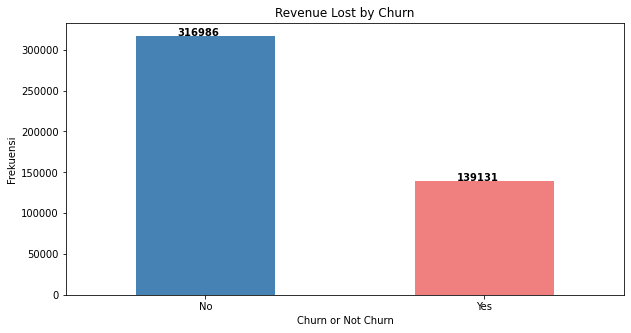

In [20]:
plt.figure(figsize=(10,5))
colour = ["steelblue","lightcoral"]
# x = df.groupby('Churn')['MonthlyCharges'].sum().plot(kind='bar',stacked = True,rot = 0,color = colour)
colour = ["steelblue","lightcoral"]
ax = (df.groupby('Churn')['MonthlyCharges'].sum()).plot(kind='bar',stacked = True,rot = 0,color = colour)
                                                                          

ax.set_ylabel("Frekuensi")
ax.set_xlabel("Churn or Not Churn")
ax.set_title("Revenue Lost by Churn")

# totals = []
# for i in ax.patches:
#     totals.append(i.get_width())

# total = sum(totals)

# for i in ax.patches:
#     ax.text(i.get_x()+.15, i.get_height()+50), 
#             fontsize=12,
#             color='black',
#            weight = 'bold')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+100),fontsize=10,weight='bold')
plt.show()

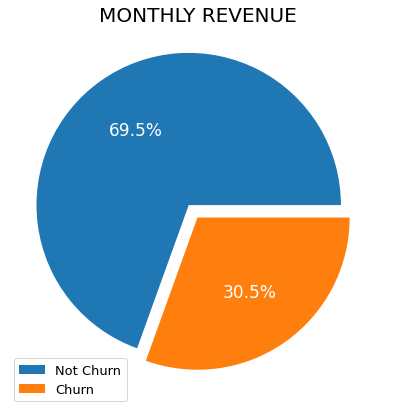

In [21]:
plt.figure(figsize = (8,7))
plt.title('MONTHLY REVENUE', fontsize = 20)

labels = 'Not Churn', 'Churn'

plt.pie(df.groupby('Churn')['MonthlyCharges'].sum(), autopct = '%.1f%%', 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0))

plt.legend(labels, loc='lower left', fontsize = 13)

plt.show()

# __FEATURE DISTIBUTION__  

# * GENDER *

In [22]:
df["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [23]:
df["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

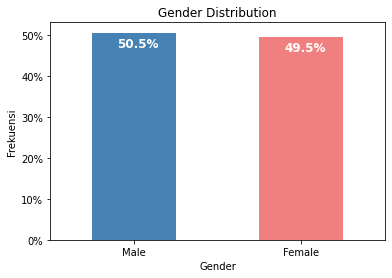

In [24]:
colour = ["steelblue","lightcoral"]
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colour)
                                                                          
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("Frekuensi")
ax.set_xlabel("Gender")
ax.set_title("Gender Distribution")

totals = []
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')


### Distribution of Gender based on Churn

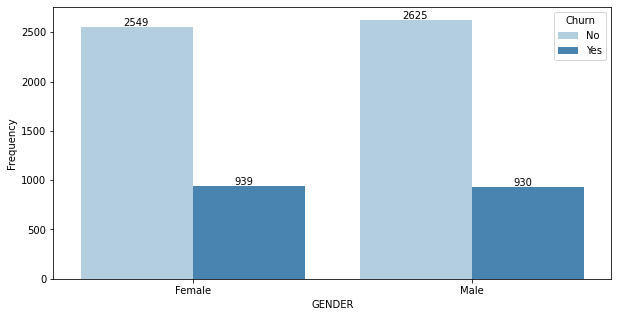

In [25]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["gender"], hue = df["Churn"], palette = "Blues")
plt.xlabel('GENDER')
plt.ylabel('Frequency')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+15),fontsize=10)
plt.show()

### Percentage Gender on Churn

In [26]:
listItem = []
for col in df["gender"].unique():
    listItem.append([col, 
                    (df[(df["Churn"]=="Yes")&(df["gender"]==col)]["Churn"].count() / df[df["gender"]==col]["Churn"].count() * 100),
                    (df[(df["Churn"]== "No")&(df["gender"]==col)]["Churn"].count() / df[df["gender"]==col]["Churn"].count() * 100)
                    ])
    
dfGender = pd.DataFrame(listItem, columns='Gender,Churn,No Churn'.split(','))
dfGender

,Gender,Churn,No Churn
0,Female,26.920872,73.079128
1,Male,26.160338,73.839662


#### - There is not too much difference in our customers on gender

# * SENIOR CITIZEN *

In [27]:
df["SeniorCitizen"].unique()

array([0, 1])

In [28]:
df["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

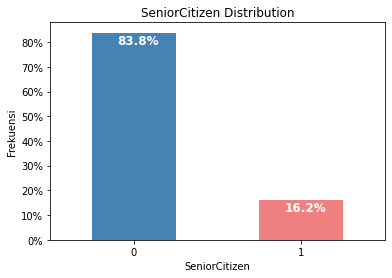

In [29]:
colour = ["steelblue","lightcoral"]
ax = (df["SeniorCitizen"].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colour)
                                                                          
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("Frekuensi")
ax.set_xlabel("SeniorCitizen")
ax.set_title("SeniorCitizen Distribution")

totals = []
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-4.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

### Distribution of SeniorCitizen based on Churn

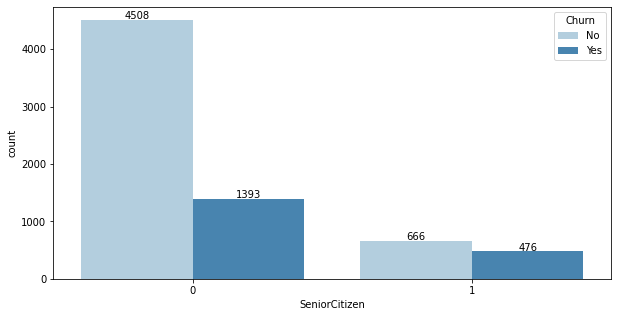

In [30]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["SeniorCitizen"], hue = df["Churn"], palette = "Blues")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 18,
            '{:.0f}'.format(height),
            ha="center"
           ) 
plt.show()


### Percentage SeniorCitizen on Churn

In [31]:
listItem = []
for col in df["SeniorCitizen"].unique():
    listItem.append([col, 
                    (df[(df["Churn"]=="Yes")&(df["SeniorCitizen"]==col)]["Churn"].count() / df[df["SeniorCitizen"]==col]["Churn"].count() * 100),
                    (df[(df["Churn"]== "No")&(df["SeniorCitizen"]==col)]["Churn"].count() / df[df["SeniorCitizen"]==col]["Churn"].count() * 100)
                    ])
    
dfSeniorCitizen = pd.DataFrame(listItem, columns='SeniorCitizen,Churn,No Churn'.split(','))
dfSeniorCitizen

,SeniorCitizen,Churn,No Churn
0,0,23.606168,76.393832
1,1,41.681261,58.318739


#### - 16.2 % from our customer is a SeniorCitizen which I think this is a valuable information for the company's, especially their marketing, as from this information they might find some interesting new approach to their customers.

# * PARTNER *

In [32]:
df["Partner"].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

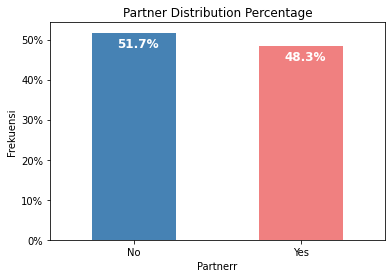

In [33]:
colour = ["steelblue","lightcoral"]
ax = (df["Partner"].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colour)
                                                                          
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("Frekuensi")
ax.set_xlabel("Partnerr")
ax.set_title("Partner Distribution Percentage")

totals = []
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

### Distribution of Partner based on Churn

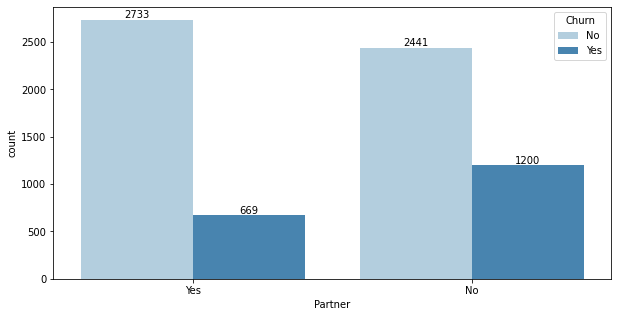

In [34]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["Partner"], hue = df["Churn"], palette = "Blues")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 18,
            '{:.0f}'.format(height),
            ha="center"
           ) 
plt.show()

### Percentage Partner on Churn

In [35]:
listItem = []
for col in df["Partner"].unique():
    listItem.append([col, 
                    (df[(df["Churn"]=="Yes")&(df["Partner"]==col)]["Churn"].count() / df[df["Partner"]==col]["Churn"].count() * 100),
                    (df[(df["Churn"]== "No")&(df["Partner"]==col)]["Churn"].count() / df[df["Partner"]==col]["Churn"].count() * 100)
                    ])
    
dfPartner = pd.DataFrame(listItem, columns='Partner,Churn,No Churn'.split(','))
dfPartner

,Partner,Churn,No Churn
0,Yes,19.664903,80.335097
1,No,32.957979,67.042021


#### - There is we can see 48.3 % from our customer whom having a Partner, the rest of them are having no Parter, might be 'single'.

# * DEPENDENTS *

In [36]:
df["Dependents"].unique()

array(['No', 'Yes'], dtype=object)

In [37]:
df["Dependents"].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

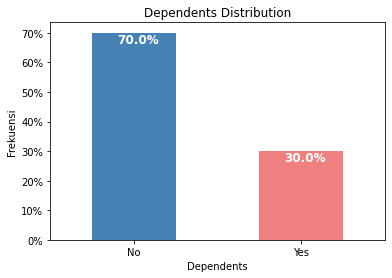

In [38]:
colour = ["steelblue","lightcoral"]
ax = (df["Dependents"].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colour)
                                                                          
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("Frekuensi")
ax.set_xlabel("Dependents")
ax.set_title("Dependents Distribution")

totals = []
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

### Distribution of Dependents based on Churn

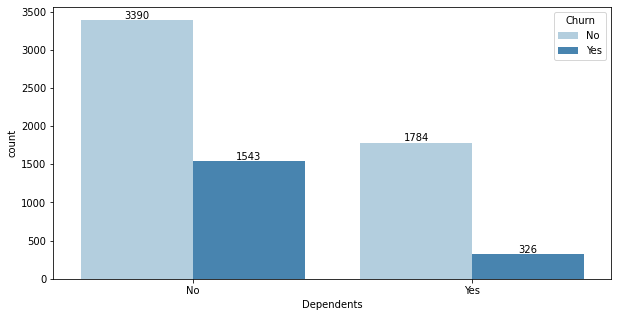

In [39]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["Dependents"], hue = df["Churn"], palette = "Blues")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 18,
            '{:.0f}'.format(height),
            ha="center"
           ) 
plt.show()

### Percentage Dependents on Churn

In [40]:
listItem = []
for col in df["Dependents"].unique():
    listItem.append([col, 
                    (df[(df["Churn"]=="Yes")&(df["Dependents"]==col)]["Churn"].count() / df[df["Dependents"]==col]["Churn"].count() * 100),
                    (df[(df["Churn"]== "No")&(df["Dependents"]==col)]["Churn"].count() / df[df["Dependents"]==col]["Churn"].count() * 100)
                    ])
    
dfDependents = pd.DataFrame(listItem, columns='Dependents,Churn,No Churn'.split(','))
dfDependents

,Dependents,Churn,No Churn
0,No,31.279140,68.720860
1,Yes,15.450237,84.549763


- it's about 30% from our customer who are having Dependent status

# * Service Type *

#  PhoneService 

In [41]:
df["PhoneService"].unique()

array(['No', 'Yes'], dtype=object)

In [42]:
df["PhoneService"].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

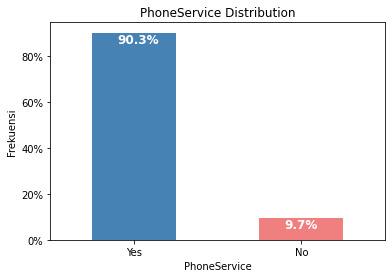

In [43]:
colour = ["steelblue","lightcoral"]
ax = (df["PhoneService"].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colour)
                                                                          
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("Frekuensi")
ax.set_xlabel("PhoneService")
ax.set_title("PhoneService Distribution")

totals = []
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-4.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

### Distribution of PhoneService based on Churn

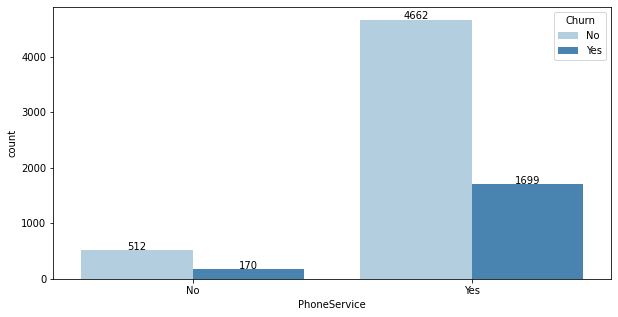

In [44]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["PhoneService"], hue = df["Churn"], palette = "Blues")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 18,
            '{:.0f}'.format(height),
            ha="center"
           ) 
plt.show()

### Percentage Phone Service on Churn

In [45]:
listItem = []
for col in df["PhoneService"].unique():
    listItem.append([col, 
                    (df[(df["Churn"]=="Yes")&(df["PhoneService"]==col)]["Churn"].count() / df[df["PhoneService"]==col]["Churn"].count() * 100),
                    (df[(df["Churn"]== "No")&(df["PhoneService"]==col)]["Churn"].count() / df[df["PhoneService"]==col]["Churn"].count() * 100)
                    ])
    
dfPhoneService = pd.DataFrame(listItem, columns='PhoneService,Churn,No Churn'.split(','))
dfPhoneService

,PhoneService,Churn,No Churn
0,No,24.926686,75.073314
1,Yes,26.709637,73.290363


### - Majority of our customers (90%) choose to have a Phone Service

# * MULTIPLELINES *

In [46]:
df["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [47]:
df["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [48]:
df["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

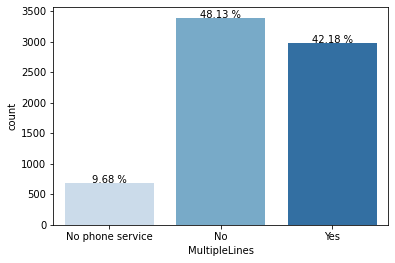

In [49]:
ax = sns.countplot(df["MultipleLines"],palette="Blues") 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} %'.format(height*100/len(df)),
            ha="center"
           ) 
plt.show()

### Distribution of MultipleLines based on Churn

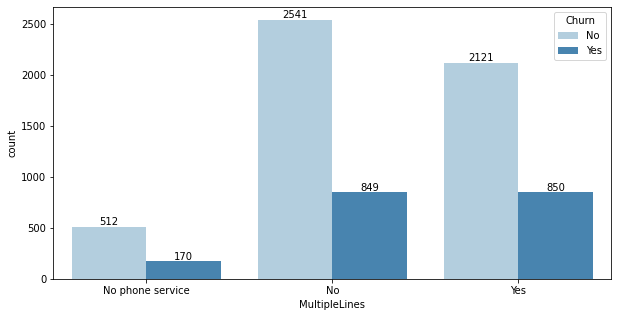

In [50]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["MultipleLines"], hue = df["Churn"], palette = "Blues")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 18,
            '{:.0f}'.format(height),
            ha="center"
           ) 
plt.show()

### Percentage Churn on MultipleLine

In [51]:
listItem = []
for col in df["MultipleLines"].unique():
    listItem.append([col, 
                    (df[(df["Churn"]=="Yes")&(df["MultipleLines"]==col)]["Churn"].count() / df[df["MultipleLines"]==col]["Churn"].count() * 100),
                    (df[(df["Churn"]== "No")&(df["MultipleLines"]==col)]["Churn"].count() / df[df["MultipleLines"]==col]["Churn"].count() * 100)
                    ])
    
dfMultipleLines = pd.DataFrame(listItem, columns='MultipleLines,Churn,No Churn'.split(','))
dfMultipleLines

,MultipleLines,Churn,No Churn
0,No phone service,24.926686,75.073314
1,No,25.044248,74.955752
2,Yes,28.609896,71.390104


#### 48% of our customer not having multiple lines installed and 42% choose to have multiple lines, and almost 10% of our customer having no phone services in their area,

# * INTERNET SERVICE *

In [52]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [53]:
df["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

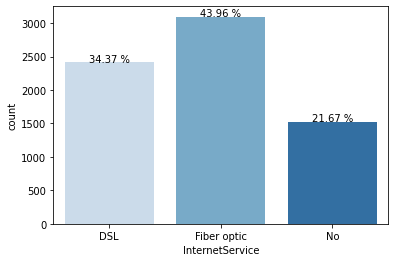

In [54]:
ax = sns.countplot(df["InternetService"],palette="Blues") 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} %'.format(height*100/len(df)),
            ha="center"
           ) 
plt.show()

### Distribution of InternetService based on Churn

In [55]:
df.groupby("Churn")["InternetService"].value_counts()

Churn  InternetService
No     DSL                1962
       Fiber optic        1799
       No                 1413
Yes    Fiber optic        1297
       DSL                 459
       No                  113
Name: InternetService, dtype: int64

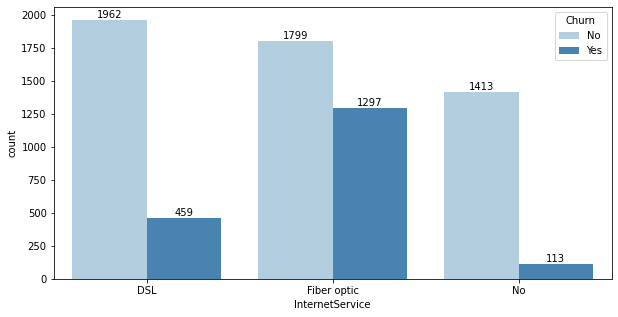

In [56]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["InternetService"], hue = df["Churn"], palette = "Blues")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 18,
            '{:.0f}'.format(height),
            ha="center"
           ) 
plt.show()

### Percentage InternetService on Churn

In [57]:
listItem = []
for col in df["InternetService"].unique():
    listItem.append([col, 
                    (df[(df["Churn"]=="Yes")&(df["InternetService"]==col)]["Churn"].count() / df[df["InternetService"]==col]["Churn"].count() * 100),
                    (df[(df["Churn"]== "No")&(df["InternetService"]==col)]["Churn"].count() / df[df["InternetService"]==col]["Churn"].count() * 100)
                    ])
    
dfInternetService = pd.DataFrame(listItem, columns='InternetService,Churn,No Churn'.split(','))
dfInternetService

,InternetService,Churn,No Churn
0,DSL,18.959108,81.040892
1,Fiber optic,41.892765,58.107235
2,No,7.404980,92.595020


#### 21.67 % our customer not using the Internet services provided, while the rest of them (about 78%) are choosing to enable their services

# * OnlineSecurity *

In [58]:
df["OnlineSecurity"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [59]:
df["OnlineSecurity"].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

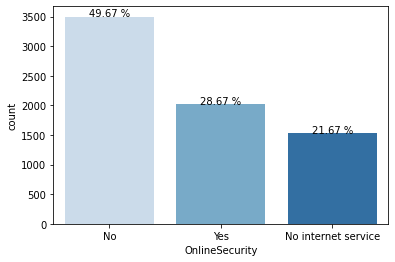

In [60]:
ax = sns.countplot(df["OnlineSecurity"],palette="Blues") 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} %'.format(height*100/len(df)),
            ha="center"
           ) 
plt.show()

### Distribution of OnlineSecurity based on Churn

In [61]:
df.groupby("Churn")["OnlineSecurity"].value_counts()

Churn  OnlineSecurity     
No     No                     2037
       Yes                    1724
       No internet service    1413
Yes    No                     1461
       Yes                     295
       No internet service     113
Name: OnlineSecurity, dtype: int64

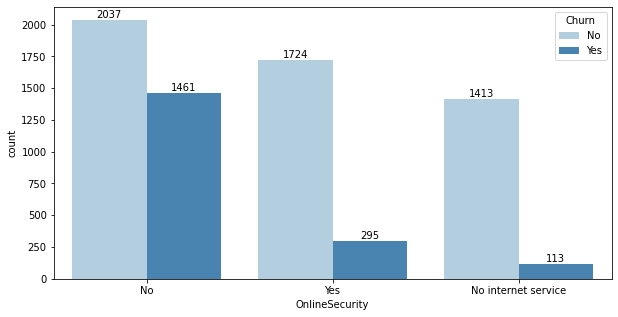

In [62]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["OnlineSecurity"], hue = df["Churn"], palette = "Blues")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 18,
            '{:.0f}'.format(height),
            ha="center"
           ) 
plt.show()

### Percentage Online Security on churn

In [63]:
listItem = []
for col in df["OnlineSecurity"].unique():
    listItem.append([col, 
                    (df[(df["Churn"]=="Yes")&(df["OnlineSecurity"]==col)]["Churn"].count() / df[df["OnlineSecurity"]==col]["Churn"].count() * 100),
                    (df[(df["Churn"]== "No")&(df["OnlineSecurity"]==col)]["Churn"].count() / df[df["OnlineSecurity"]==col]["Churn"].count() * 100)
                    ])
    
dfOnlineSecurity = pd.DataFrame(listItem, columns='OnlineSecurity,Churn,No Churn'.split(','))
dfOnlineSecurity

,OnlineSecurity,Churn,No Churn
0,No,41.766724,58.233276
1,Yes,14.611194,85.388806
2,No internet service,7.404980,92.595020


- 28.67 % from our customer using OnlineSecurity, i think we need more giving education our customer about how important is Online security

# * OnlineBackup *

In [64]:
df["OnlineBackup"].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [65]:
df["OnlineBackup"].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

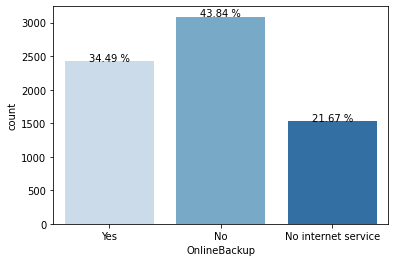

In [66]:
ax = sns.countplot(df["OnlineBackup"],palette="Blues") 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} %'.format(height*100/len(df)),
            ha="center"
           ) 
plt.show()

### Distribution of OnlineBackup based on Churn

In [67]:
df.groupby("Churn")["OnlineBackup"].value_counts()

Churn  OnlineBackup       
No     Yes                    1906
       No                     1855
       No internet service    1413
Yes    No                     1233
       Yes                     523
       No internet service     113
Name: OnlineBackup, dtype: int64

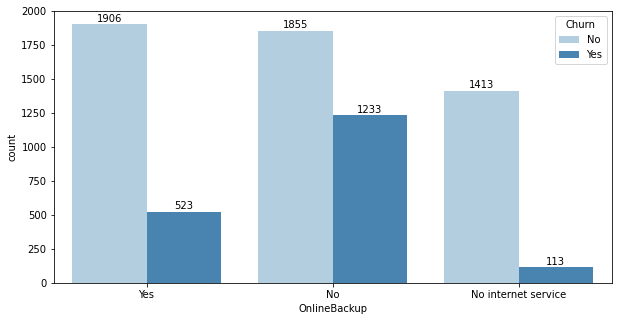

In [68]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["OnlineBackup"], hue = df["Churn"], palette = "Blues")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 18,
            '{:.0f}'.format(height),
            ha="center"
           ) 
plt.show()

### Percentage OnlineBackup on churn

In [69]:
listItem = []
for col in df["OnlineBackup"].unique():
    listItem.append([col, 
                    (df[(df["Churn"]=="Yes")&(df["OnlineBackup"]==col)]["Churn"].count() / df[df["OnlineBackup"]==col]["Churn"].count() * 100),
                    (df[(df["Churn"]== "No")&(df["OnlineBackup"]==col)]["Churn"].count() / df[df["OnlineBackup"]==col]["Churn"].count() * 100)
                    ])
    
dfOnlineBackup = pd.DataFrame(listItem, columns='OnlineBackup,Churn,No Churn'.split(','))
dfOnlineBackup

,OnlineBackup,Churn,No Churn
0,Yes,21.531494,78.468506
1,No,39.928756,60.071244
2,No internet service,7.404980,92.595020


#### same case with Online security we need more giving education about how important is Online Backup

# * DeviceProtection *

In [70]:
df["DeviceProtection"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [71]:
df["DeviceProtection"].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

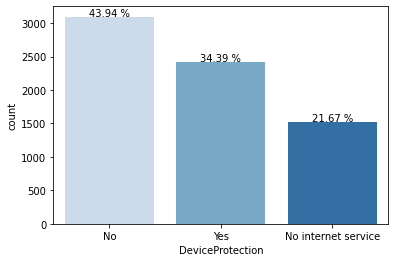

In [72]:
ax = sns.countplot(df["DeviceProtection"],palette="Blues") 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} %'.format(height*100/len(df)),
            ha="center"
           ) 
plt.show()

### Distribution of DeviceProtection based on Churn

In [73]:
df.groupby("Churn")["DeviceProtection"].value_counts()

Churn  DeviceProtection   
No     No                     1884
       Yes                    1877
       No internet service    1413
Yes    No                     1211
       Yes                     545
       No internet service     113
Name: DeviceProtection, dtype: int64

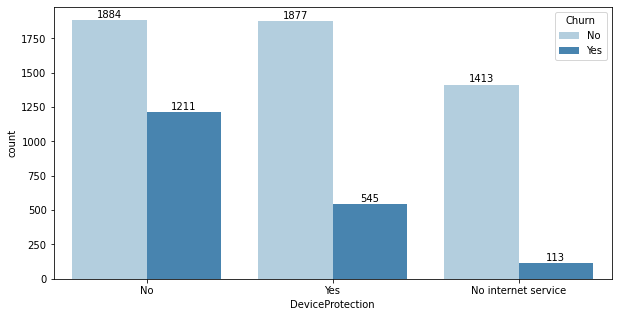

In [74]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["DeviceProtection"], hue = df["Churn"], palette = "Blues")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 18,
            '{:.0f}'.format(height),
            ha="center"
           ) 
plt.show()

### Percentage DeviceProtection on Churn

In [75]:
listItem = []
for col in df["DeviceProtection"].unique():
    listItem.append([col, 
                    (df[(df["Churn"]=="Yes")&(df["DeviceProtection"]==col)]["Churn"].count() / df[df["DeviceProtection"]==col]["Churn"].count() * 100),
                    (df[(df["Churn"]== "No")&(df["DeviceProtection"]==col)]["Churn"].count() / df[df["DeviceProtection"]==col]["Churn"].count() * 100)
                    ])
    
dfDeviceProtection = pd.DataFrame(listItem, columns='DeviceProtection,Churn,No Churn'.split(','))
dfDeviceProtection

,DeviceProtection,Churn,No Churn
0,No,39.127625,60.872375
1,Yes,22.502064,77.497936
2,No internet service,7.404980,92.595020


### 34% our customer enabled the Device Protection

# * TechSupport *

In [76]:
df["TechSupport"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [77]:
df["TechSupport"].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

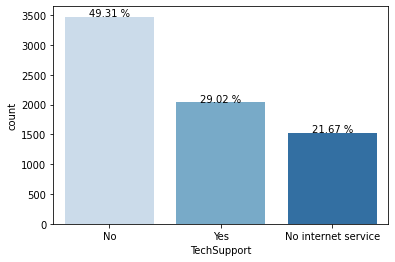

In [78]:
ax = sns.countplot(df["TechSupport"],palette="Blues") 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} %'.format(height*100/len(df)),
            ha="center"
           ) 
plt.show()

### Distribution of TechSupport based on Churn

In [79]:
df.groupby("Churn")["TechSupport"].value_counts()

Churn  TechSupport        
No     No                     2027
       Yes                    1734
       No internet service    1413
Yes    No                     1446
       Yes                     310
       No internet service     113
Name: TechSupport, dtype: int64

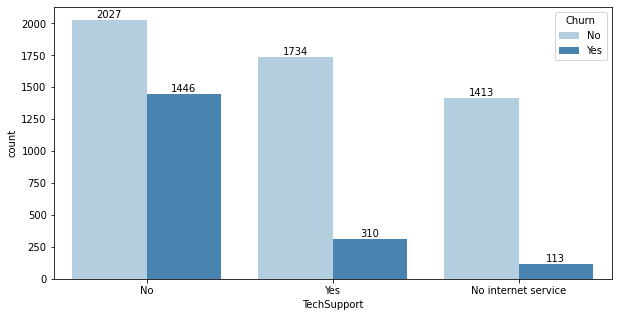

In [80]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["TechSupport"], hue = df["Churn"], palette = "Blues")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 18,
            '{:.0f}'.format(height),
            ha="center"
           ) 
plt.show()

### Percentage TechSupport on Churn

In [81]:
listItem = []
for col in df["TechSupport"].unique():
    listItem.append([col, 
                    (df[(df["Churn"]=="Yes")&(df["TechSupport"]==col)]["Churn"].count() / df[df["TechSupport"]==col]["Churn"].count() * 100),
                    (df[(df["Churn"]== "No")&(df["TechSupport"]==col)]["Churn"].count() / df[df["TechSupport"]==col]["Churn"].count() * 100)
                    ])
    
dfTechSupport = pd.DataFrame(listItem, columns='TechSupport,Churn,No Churn'.split(','))
dfTechSupport

,TechSupport,Churn,No Churn
0,No,41.635474,58.364526
1,Yes,15.166341,84.833659
2,No internet service,7.404980,92.595020


### 29% of customer enabled the Tech Support

# * StreamingTV *

In [82]:
df["StreamingTV"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [83]:
df["StreamingTV"].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

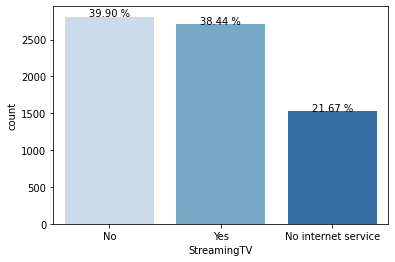

In [84]:
ax = sns.countplot(df["StreamingTV"],palette="Blues") 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} %'.format(height*100/len(df)),
            ha="center"
           ) 
plt.show()

### Distribution of StreamingTV based on Churn

In [85]:
df.groupby("Churn")["StreamingTV"].value_counts()

Churn  StreamingTV        
No     Yes                    1893
       No                     1868
       No internet service    1413
Yes    No                      942
       Yes                     814
       No internet service     113
Name: StreamingTV, dtype: int64

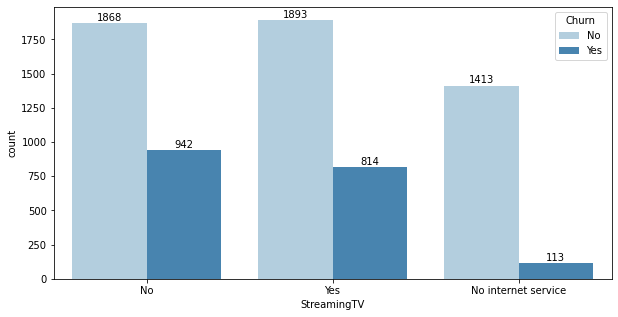

In [86]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["StreamingTV"], hue = df["Churn"], palette = "Blues")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 18,
            '{:.0f}'.format(height),
            ha="center"
           ) 
plt.show()

### Percentage StreamingTV on Churn

In [87]:
listItem = []
for col in df["StreamingTV"].unique():
    listItem.append([col, 
                    (df[(df["Churn"]=="Yes")&(df["StreamingTV"]==col)]["Churn"].count() / df[df["StreamingTV"]==col]["Churn"].count() * 100),
                    (df[(df["Churn"]== "No")&(df["StreamingTV"]==col)]["Churn"].count() / df[df["StreamingTV"]==col]["Churn"].count() * 100)
                    ])
    
dfStreamingTV = pd.DataFrame(listItem, columns='StreamingTV,Churn,No Churn'.split(','))
dfStreamingTV

,StreamingTV,Churn,No Churn
0,No,33.523132,66.476868
1,Yes,30.070188,69.929812
2,No internet service,7.404980,92.595020


### 38% customers subscibed to tv streaming and movie streaming

# * Contract *

In [88]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [89]:
df["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

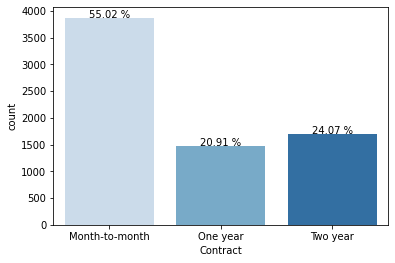

In [90]:
ax = sns.countplot(df["Contract"],palette="Blues") 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} %'.format(height*100/len(df)),
            ha="center"
           ) 
plt.show()

### Distribution of Contract based on Churn

In [91]:
df.groupby("Churn")["Contract"].value_counts()

Churn  Contract      
No     Month-to-month    2220
       Two year          1647
       One year          1307
Yes    Month-to-month    1655
       One year           166
       Two year            48
Name: Contract, dtype: int64

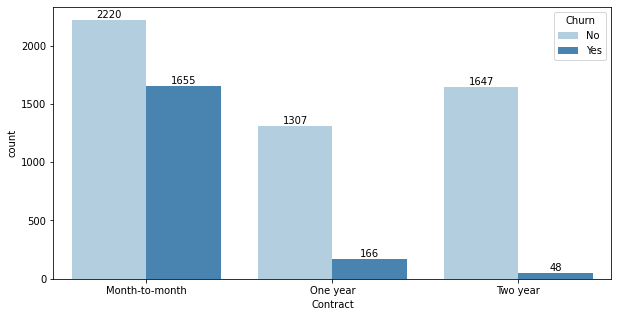

In [92]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["Contract"], hue = df["Churn"], palette = "Blues")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 20,
            '{:.0f}'.format(height),
            ha="center"
           ) 
plt.show()

### Percentage Contract on Churn

In [93]:
listItem = []
for col in df["Contract"].unique():
    listItem.append([col, 
                    (df[(df["Churn"]=="Yes")&(df["Contract"]==col)]["Churn"].count() / df[df["Contract"]==col]["Churn"].count() * 100),
                    (df[(df["Churn"]== "No")&(df["Contract"]==col)]["Churn"].count() / df[df["Contract"]==col]["Churn"].count() * 100)
                    ])
    
dfContract = pd.DataFrame(listItem, columns='Contract,Churn,No Churn'.split(','))
dfContract

,Contract,Churn,No Churn
0,Month-to-month,42.709677,57.290323
1,One year,11.269518,88.730482
2,Two year,2.831858,97.168142


#### 55 % of our customers choose month to month contract, i think this is big problem for this company, it means there are almost half the customers still unsure and having no leverage in case when they're churning. but there are 45% customers who already sure and probably loyal to this company. 

# * PaperlessBilling *

In [94]:
df["PaperlessBilling"].unique()

array(['Yes', 'No'], dtype=object)

In [95]:
df["PaperlessBilling"].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

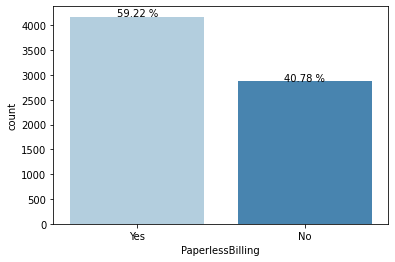

In [96]:
ax = sns.countplot(df["PaperlessBilling"],palette="Blues") 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} %'.format(height/len(df)*100),
            ha="center"
           ) 
plt.show()

### Distribution of PaperlessBilling based on Churn

In [97]:
df.groupby("Churn")["PaperlessBilling"].value_counts()

Churn  PaperlessBilling
No     Yes                 2771
       No                  2403
Yes    Yes                 1400
       No                   469
Name: PaperlessBilling, dtype: int64

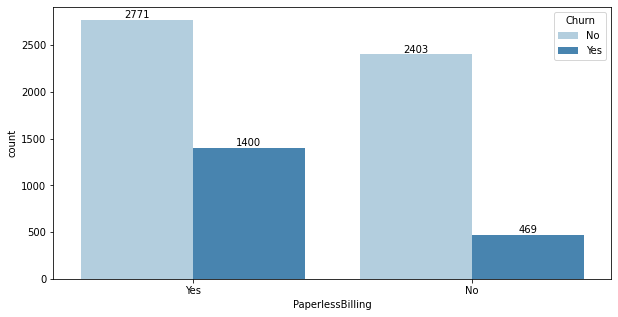

In [98]:
plt.figure(figsize=(10,5))
ax= sns.countplot(df["PaperlessBilling"], hue = df["Churn"], palette = "Blues")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 20,
            '{:.0f}'.format(height),
            ha="center"
           ) 
plt.show()

### Percentage PaperlessBilling on churn

In [99]:
listItem = []
for col in df["PaperlessBilling"].unique():
    listItem.append([col, 
                    (df[(df["Churn"]=="Yes")&(df["PaperlessBilling"]==col)]["Churn"].count() / df[df["PaperlessBilling"]==col]["Churn"].count() * 100),
                    (df[(df["Churn"]== "No")&(df["PaperlessBilling"]==col)]["Churn"].count() / df[df["PaperlessBilling"]==col]["Churn"].count() * 100)
                    ])
    
dfPaperlessBilling = pd.DataFrame(listItem, columns='PaperlessBilling,Churn,No Churn'.split(','))
dfPaperlessBilling

,PaperlessBilling,Churn,No Churn
0,Yes,33.565092,66.434908
1,No,16.330084,83.669916


#### Majority of customers have opted Paperless billing, It's good that people prefer eco-friendly bills!

# * PaymentMethod *

In [100]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [101]:
df["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

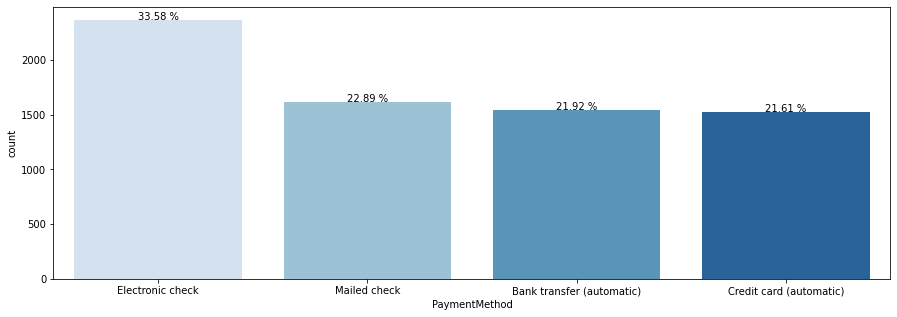

In [102]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["PaymentMethod"],palette="Blues") 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} %'.format(height*100/len(df)),
            ha="center"
           ) 
          
plt.show()

### Distribution of PaymentMethod based on Churn

In [103]:
df.groupby("Churn")["PaymentMethod"].value_counts()

Churn  PaymentMethod            
No     Mailed check                 1304
       Electronic check             1294
       Credit card (automatic)      1290
       Bank transfer (automatic)    1286
Yes    Electronic check             1071
       Mailed check                  308
       Bank transfer (automatic)     258
       Credit card (automatic)       232
Name: PaymentMethod, dtype: int64

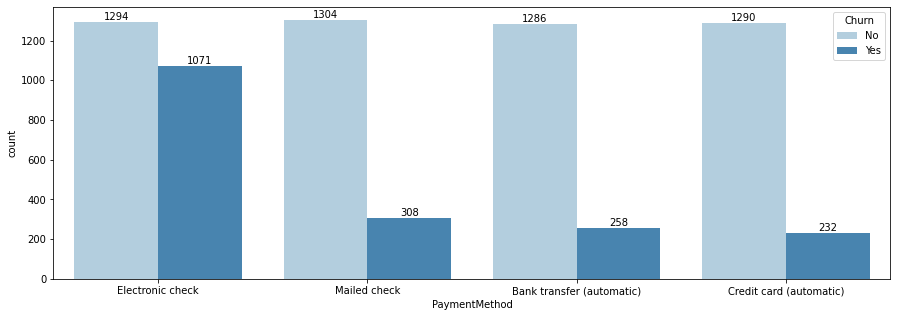

In [104]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["PaymentMethod"], hue = df["Churn"], palette = "Blues")   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            '{:.0f}'.format(height),
            ha="center"
           )     
plt.show()             

### Percentage PaymentMethod on Churn

In [105]:
listItem = []
for col in df["PaymentMethod"].unique():
    listItem.append([col, 
                    (df[(df["Churn"]=="Yes")&(df["PaymentMethod"]==col)]["Churn"].count() / df[df["PaymentMethod"]==col]["Churn"].count() * 100),
                    (df[(df["Churn"]== "No")&(df["PaymentMethod"]==col)]["Churn"].count() / df[df["PaymentMethod"]==col]["Churn"].count() * 100)
                    ])
    
dfPaperlessBilling = pd.DataFrame(listItem, columns='PaymentMethod,Churn,No Churn'.split(','))
dfPaperlessBilling

,PaymentMethod,Churn,No Churn
0,Electronic check,45.285412,54.714588
1,Mailed check,19.106700,80.893300
2,Bank transfer (automatic),16.709845,83.290155
3,Credit card (automatic),15.243101,84.756899


#### Majority of customers pay eletronic check. 43 % prefer Automatic payment (Bank Transfer and Credit Card)

### Categorical Feature Based on Churn Summary:  
-Gender, PhoneService, MultipleLines appears not having a clear difference of Churned customers as they're having no significant difference between their churned and not churned customers.

-Fiber Optic Internet service, no using Online Security, no Online Backup, no Tech support,  Month to Month Contract, and using Electronic Check Payment Method there must be further checking, because it has a high churn rate

# NUMERICAL FEATURE DISTRIBUTION 

# * TENURE *

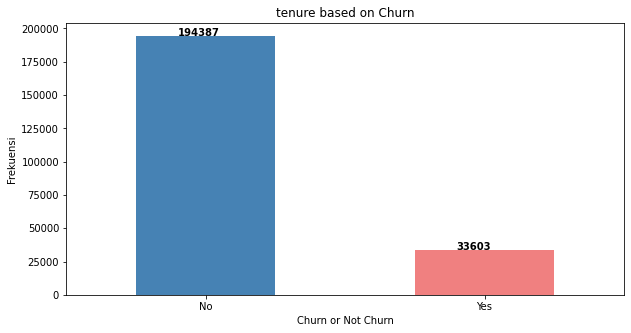

In [106]:
plt.figure(figsize=(10,5))
colour = ["steelblue","lightcoral"]

colour = ["steelblue","lightcoral"]
ax = (df.groupby('Churn')['tenure'].sum()).plot(kind='bar',stacked = True,rot = 0,color = colour)
                                                                          

ax.set_ylabel("Frekuensi")
ax.set_xlabel("Churn or Not Churn")
ax.set_title("tenure based on Churn")

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+100),fontsize=10,weight='bold')
plt.show()

In [107]:
df.groupby('Churn')['tenure'].sum()

Churn
No     194387
Yes     33603
Name: tenure, dtype: int64

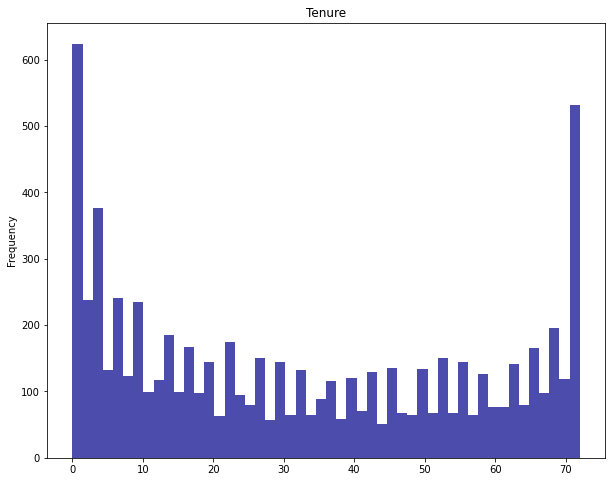

In [108]:
plt.subplots(figsize=(10,8))
#Charting the histogram
df["tenure"].plot.hist(color='DarkBlue', alpha=0.7, bins=50, title='Tenure')
plt.show()

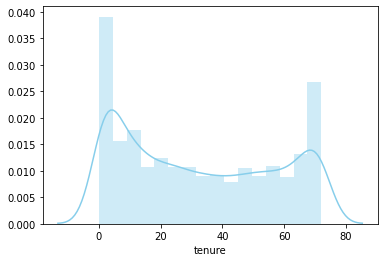

In [109]:
sns.distplot( df["tenure"] , kde=True, rug=False, color="skyblue")

- Distribusi data tenure mempunyai 2 mode (BI modal distribution) yang membuat data berpusat di dua mode tersebut
- kita punya customer di atas 60-70+ bulan yang merupakan customer loyal kita dan potensial
- Banyaknya customer 0-1 bulan memperlihatkan banyaknya customer hanya ingin mencoba service kita dan tidak melanjutkannya


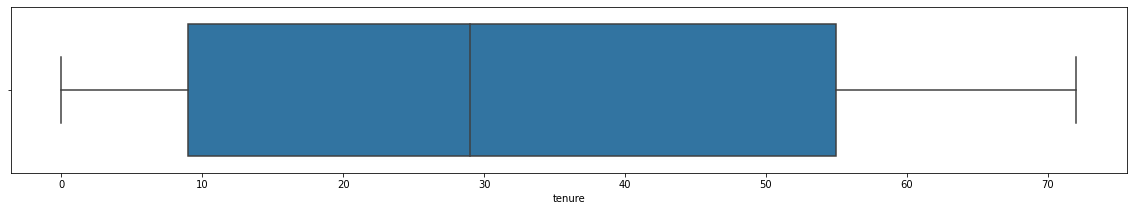

In [110]:
Kolom=["tenure"]
a = 1
plt.figure(figsize=(20,25))

for i in Kolom:
    plt.subplot(7,1,a)
    sns.boxplot(df[i])
    a += 1
plt.show()

- dari Visual di atas kita dapat melihat Tenure data tidak mempunyai outlier

### Relation Tenure based on Churn

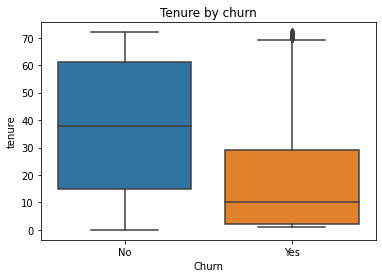

In [111]:
ax =sns.boxplot(x = df["Churn"], y = df["tenure"])
ax.set_title('Tenure by churn')
ax

- Sudah pasti dan jelas bahwa customer yang tidak churn adalah yang tenure bulannya lebih lama

# * MonthlyCharges *

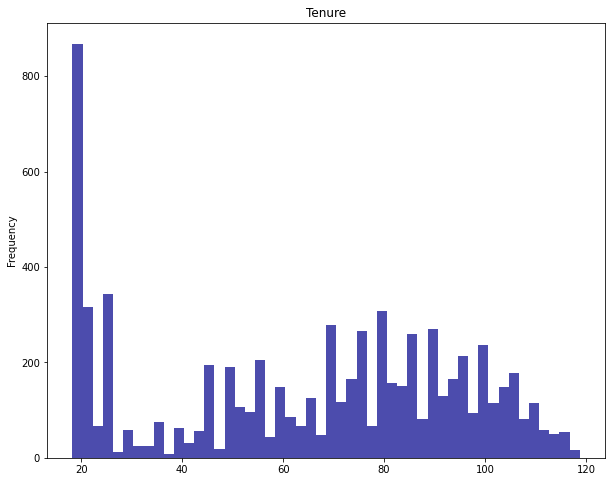

In [112]:
plt.subplots(figsize=(10,8))
#Charting the histogram
df["MonthlyCharges"].plot.hist(color='DarkBlue', alpha=0.7, bins=50, title='Tenure')
plt.show()

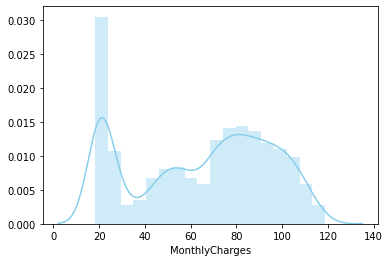

In [113]:
sns.distplot( df["MonthlyCharges"] , kde=True, rug=False, color="skyblue")

- dari visualisasi di atas kita liat juga hampir mempunyai 2 mode (bimodal distribution)
- Paling customer yang membayar 20-80 dollar sebulan berarti customer banyak yang hanya memakai basic service dari perusahaan
- Dari yang membayar 70-100 dollar terdapat customer yang pasti memakai lebih dari dua services dari perusahaan 

In [129]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalChargesNum
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,No,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,No,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes,306.60


### Relation MonthlyCharges based on Churn

Text(0.5, 0, 'Churn')

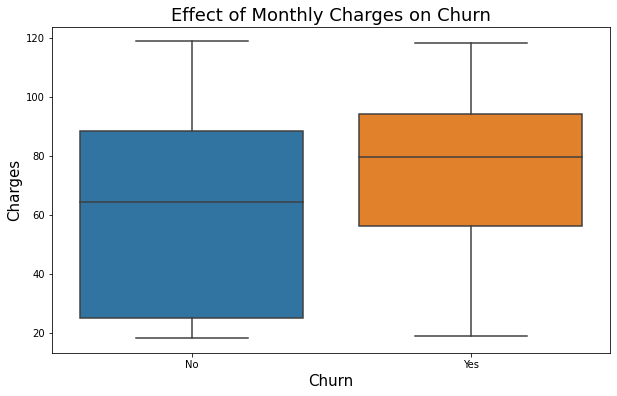

In [114]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='Churn', y = 'MonthlyCharges', data=df)
ax.set_title('Effect of Monthly Charges on Churn', fontsize=18)
ax.set_ylabel('Charges', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)

Clients with higher MonthlyCharges are also more likely to churn


### Cek Outlier MonthlyCharges

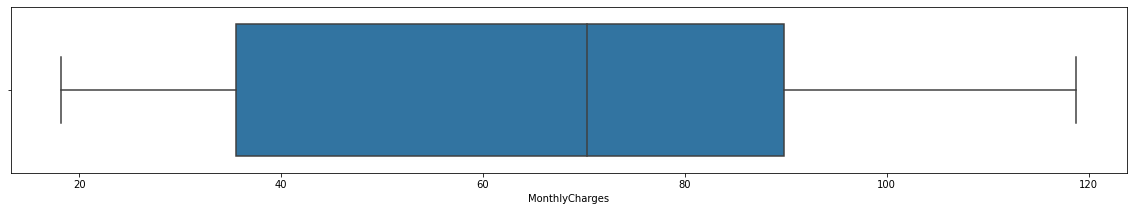

In [115]:
Kolom=["MonthlyCharges"]
a = 1
plt.figure(figsize=(20,25))

for i in Kolom:
    plt.subplot(7,1,a)
    sns.boxplot(df[i])
    a += 1
plt.show()

- Dari Visualisasi di atas kita lihat bahwa tidak terdapatnya outlier pada distribusi data di MonthlyCharges

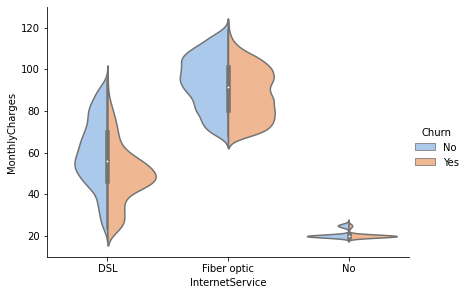

In [135]:
ax = sns.catplot(x="InternetService", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=df, height=4.2, aspect=1.4);

- yang membayar 20 $ ke ataslah memakai service internet

# * TotalCharges *

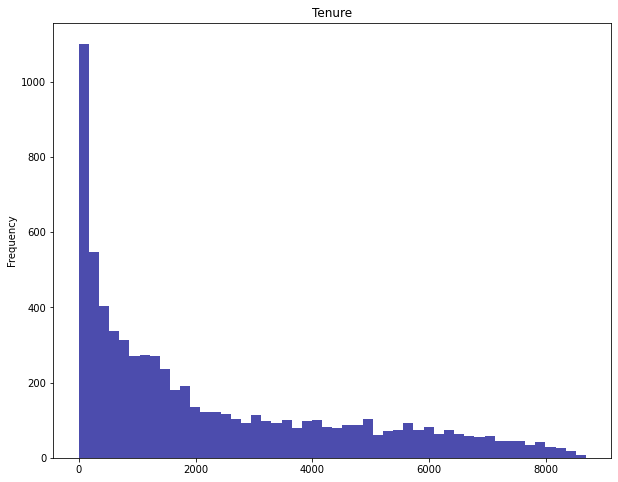

In [116]:
plt.subplots(figsize=(10,8))
#Charting the histogram
df["TotalChargesNum"].plot.hist(color='DarkBlue', alpha=0.7, bins=50, title='Tenure')
plt.show()

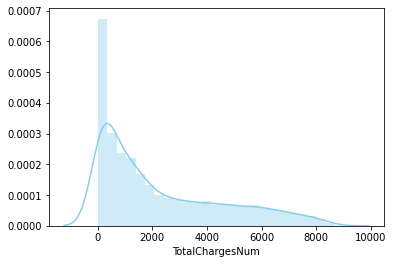

In [117]:
sns.distplot( df["TotalChargesNum"] , kde=True, rug=False, color="skyblue")

- Dari data Visualisasi di atas distribusinya baik
- Kebanyakan Customer menghabiskan sekitar hampir 1000 dollar
- Total customer telah menghabiskan sekita 9000 dollar

Text(0.5, 1.0, 'Distribution of TotalCharge by churn')

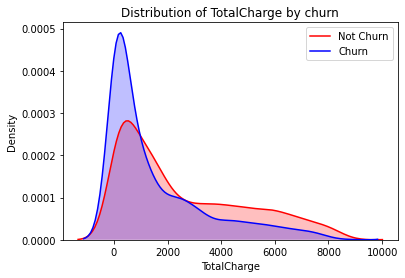

In [118]:
ax = sns.kdeplot(df["TotalChargesNum"][df["Churn"] == 'No'],
                color="Red", shade = True)
ax = sns.kdeplot(df["TotalChargesNum"][df["Churn"] == 'Yes'],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('TotalCharge')
ax.set_title('Distribution of TotalCharge by churn')

Total charges are Tenure * MonthlyCharges 

### Relation Totalcharge dan Tenure

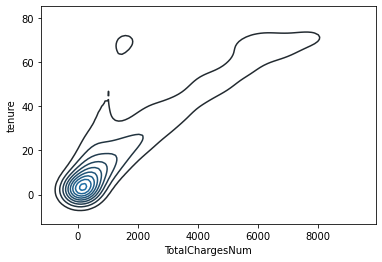

In [119]:
x = df["TotalChargesNum"]
y= df["tenure"]
sns.kdeplot(x,y)

### Outlier TotalCharges Cek

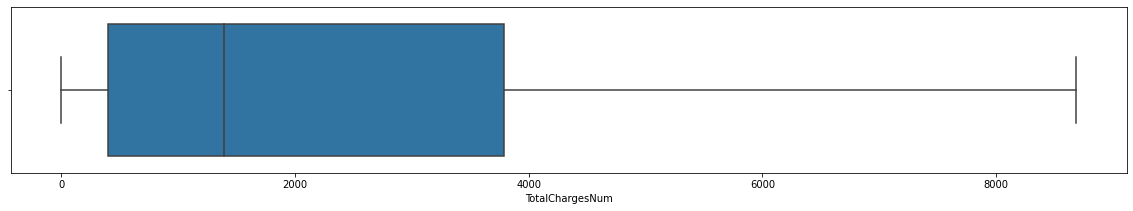

In [120]:
Kolom=["TotalChargesNum"]
a = 1
plt.figure(figsize=(20,25))

for i in Kolom:
    plt.subplot(7,1,a)
    sns.boxplot(df[i])
    a += 1
plt.show()

- Tidak ada outlier pada feature TotalCharges

# ENCODE CATEGORICAL FEATURE

In [121]:
def unik(columnname):
    print(columnname,":" ,df[columnname].unique())
for i in range(1,len(df.columns)):
    unik(df.columns[i])

SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Churn : ['No' 'Yes

In [122]:
df2 = df.copy()

In [123]:
le = LabelEncoder()
le_count = 0
for col in df2.columns[0:]:
    if df2[col].dtype == 'object':
        if len(list(df2[col].unique())) <= 2:
            le.fit(df2[col])
            df2[col] = le.transform(df2[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

6 columns were label encoded.


In [124]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalChargesNum
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,0,29.85
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,0,1889.50
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,1,108.15
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,0,1840.75
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,1,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,0,1990.50
7039,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,0,7362.90
7040,0,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,0,346.45
7041,1,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,1,306.60


In [125]:
df2 = pd.get_dummies(df2)

In [126]:
pd.set_option('display.max_columns', None)
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,TotalChargesNum,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,0,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,0,1889.50,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,1,108.15,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,0,1840.75,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,1,151.65,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,0,1990.50,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,0,7362.90,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,0,346.45,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,1,306.60,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


- SCALLING dataset dengan menggunakan minmax Scaller, dengan range 0-5, Agar Performa Machine learning lebih baik jika skala antar feature seimbang

In [127]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,TotalChargesNum,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,0,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,0,1889.50,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,1,108.15,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,0,1840.75,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,1,151.65,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,0,1990.50,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,0,7362.90,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,0,346.45,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,1,306.60,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [128]:
# scaler = MinMaxScaler(feature_range=(0, 5))
# Churn_col = list(df2.columns)
# Churn_col.remove("Churn")
# for col in Churn_col:
#     df2[col] = df2[col].astype(float)
#     df2[[col]] = scaler.fit_transform(df2[[col]])
# df2["Churn"] = pd.to_numeric(df2["Churn"], downcast='float')
# df2